In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget


In [2]:
# Add all folders and files to our x and y
x = np.empty((0, 6400))
y = np.array([])

total_folders = 9
total_files = sum(len(os.listdir(str(i))) for i in range(1, 10))
processed_files = 0

for folder in range(1, 10):
    folder_str = str(folder)
    folder_files = os.listdir(folder_str)
    
    for file_name in folder_files:
        img = cv2.imread(f"{folder_str}/{file_name}")
        img2_resized = cv2.resize(img, (40, 160))
        remove_color = cv2.cvtColor(img2_resized, cv2.COLOR_BGR2GRAY)
        flatted_image = remove_color.flatten()
        x = np.append(x, [flatted_image], axis=0)
        y = np.append(y, folder)
        
        processed_files += 1
        progress = (processed_files / total_files) * 100
        print(f"\rOverall progress: [{('=' * int(progress // 2)).ljust(50)}] {progress:.1f}%", end="")

print("\nData collection completed.")

Overall progress: [==================================================] 100.0%
Data collection completed.


In [3]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [4]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2)

In [5]:
model = linear_model.LogisticRegression()
model.max_iter = 100000

In [6]:
model.fit(x_train , y_train)

LogisticRegression(max_iter=100000)

In [7]:
out = model.predict(x_test)

In [8]:
out

array([1., 8., 2., 3., 1., 4., 1., 5., 1., 4., 4., 6., 9., 7., 5., 5., 3.,
       7., 8., 4., 2., 5., 4., 3., 9., 6., 3., 3., 5., 2., 6., 6., 4., 9.,
       9., 4., 1., 3., 2., 3., 2., 2., 9., 5., 1., 7., 9., 2., 3., 6., 2.,
       9., 9., 8., 1., 9., 4., 1., 2., 9., 1., 2., 9., 9., 1., 6., 5., 7.,
       9., 9., 3., 7., 1., 7., 4., 5., 7., 6., 7., 3., 1., 5., 2., 3., 2.,
       3., 3., 1., 1., 2., 2., 3., 9., 8., 6., 1., 5., 1., 2., 9., 3., 8.,
       4., 2., 4., 5., 2., 2., 3., 2., 3., 2., 9., 6., 5., 4., 4., 9., 4.,
       5., 3., 4., 5., 9., 5., 5., 9., 9., 2., 7., 4., 2., 8., 4., 3., 5.,
       3., 9., 4., 2., 1., 8., 2., 3., 7., 6., 1., 2., 2., 1., 5., 2., 4.,
       1., 6., 9., 7., 9., 8., 1., 5., 8., 1., 2., 5., 2., 3., 6., 9., 7.,
       3., 4., 9., 9., 7., 9., 7., 3., 1., 8., 6., 4., 7., 5., 9., 1., 3.,
       7., 8., 3., 8., 2., 1., 7., 7., 4., 7., 9., 3., 1., 3., 3., 4., 3.,
       7., 1., 9., 4., 6., 9., 8., 5., 2., 2., 2., 5., 4., 2., 5., 4., 9.,
       8., 7., 4., 1., 7.

In [9]:
y_test

array([1., 8., 2., 3., 1., 4., 1., 5., 1., 6., 4., 6., 9., 7., 5., 5., 3.,
       7., 8., 4., 2., 5., 4., 6., 9., 4., 3., 3., 5., 2., 6., 6., 4., 9.,
       9., 4., 1., 3., 2., 3., 2., 2., 9., 5., 9., 7., 9., 2., 3., 6., 2.,
       9., 9., 8., 1., 9., 4., 1., 2., 9., 1., 2., 9., 9., 1., 6., 5., 7.,
       9., 9., 3., 7., 1., 7., 4., 5., 7., 6., 7., 3., 9., 5., 2., 3., 2.,
       3., 3., 1., 1., 2., 2., 3., 9., 8., 6., 7., 5., 1., 2., 9., 3., 8.,
       4., 2., 6., 5., 2., 2., 3., 2., 3., 2., 9., 6., 5., 4., 3., 9., 4.,
       5., 3., 4., 5., 9., 5., 5., 9., 9., 2., 7., 4., 2., 8., 4., 3., 5.,
       3., 9., 4., 2., 1., 8., 2., 3., 7., 6., 1., 5., 2., 1., 5., 2., 4.,
       1., 6., 9., 7., 9., 8., 1., 5., 8., 1., 2., 5., 2., 3., 6., 1., 9.,
       3., 4., 9., 9., 7., 9., 7., 3., 1., 8., 7., 4., 7., 5., 9., 1., 1.,
       7., 8., 3., 8., 2., 1., 7., 7., 4., 7., 9., 3., 1., 3., 3., 4., 3.,
       7., 1., 9., 4., 6., 9., 8., 5., 2., 3., 9., 5., 4., 2., 5., 4., 9.,
       8., 7., 4., 1., 7.

In [10]:
result = out - y_test

In [11]:
result

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -2.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -3.,  0.,  2.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0., -8.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0., -8.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0., -6.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
       -2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0., -3.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  8.,
       -2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1

In [12]:
correct = 0
for item in result:
    if item != 0:
        correct += 1

In [13]:
correct

60

In [14]:
len(y_test)


621

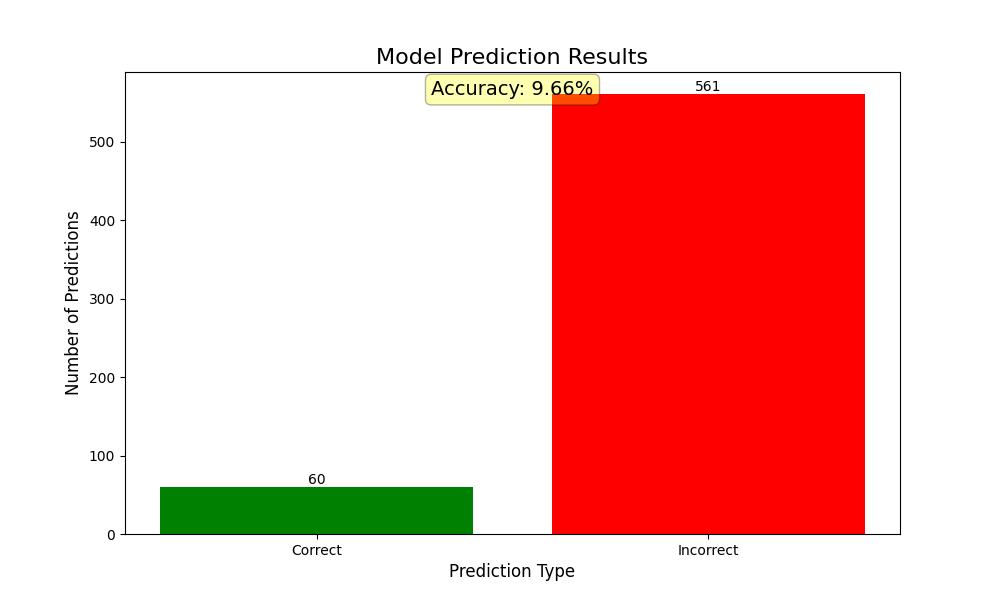

🎯 Model Performance:
✅ Correct predictions: 60
❌ Incorrect predictions: 561
🏆 Accuracy: 9.66%


In [15]:

correct_predictions = correct
total_predictions = len(y_test)
accuracy_percentage = (correct_predictions / total_predictions) * 100

plt.figure(figsize=(10, 6))
plt.bar(['Correct', 'Incorrect'], [correct_predictions, total_predictions - correct_predictions], color=['green', 'red'])
plt.title('Model Prediction Results', fontsize=16)
plt.xlabel('Prediction Type', fontsize=12)
plt.ylabel('Number of Predictions', fontsize=12)
plt.text(0, correct_predictions, f'{correct_predictions}', ha='center', va='bottom')
plt.text(1, total_predictions - correct_predictions, f'{total_predictions - correct_predictions}', ha='center', va='bottom')
plt.annotate(f'Accuracy: {accuracy_percentage:.2f}%', xy=(0.5, 0.95), xycoords='axes fraction', ha='center', fontsize=14, bbox=dict(boxstyle="round,pad=0.3", fc="yellow", ec="black", alpha=0.3))

plt.show()

print(f"🎯 Model Performance:")
print(f"✅ Correct predictions: {correct_predictions}")
print(f"❌ Incorrect predictions: {total_predictions - correct_predictions}")
print(f"🏆 Accuracy: {accuracy_percentage:.2f}%")

In [16]:
#custome test
def c_predict(folder , file):
    x1 = np.empty((0 , 6400))
    test_image = cv2.imread(f"{folder}/{folder} ({file}).jpg")
    test_resize = cv2.resize(test_image , (40 , 160))
    test_2gray = cv2.cvtColor(test_resize , cv2.COLOR_BGR2GRAY)
    testim_flatten = test_2gray.flatten()
    x1 = np.append(x1 , [testim_flatten] , axis=0)
    custome_test = model.predict(x1)
    return custome_test


In [17]:
print(c_predict(folder=1 , file=351))

[1.]


In [18]:
plk_gray = cv2.imread("pelak.jpg" , 0)
pelak_img = cv2.imread("pelak.jpg")
#ret , pelak_img = cv2.threshold(pelak_img , 50 , 255 , cv2.THRESH_BINARY)
pelak_img = cv2.resize(pelak_img, (411, 90))

In [19]:
pelak_img.shape

(90, 411, 3)

In [20]:
s = 90 - (np.sum(pelak_img, axis=0, keepdims=True) / 255)

In [21]:
s.shape

(1, 411, 3)

In [22]:
s.shape

(1, 411, 3)

In [23]:
pelak = pelak_img.copy()

pelak = cv2.line(pelak , (257 , 0) , (257 , 90) , (0 , 0 , 0) , 2)

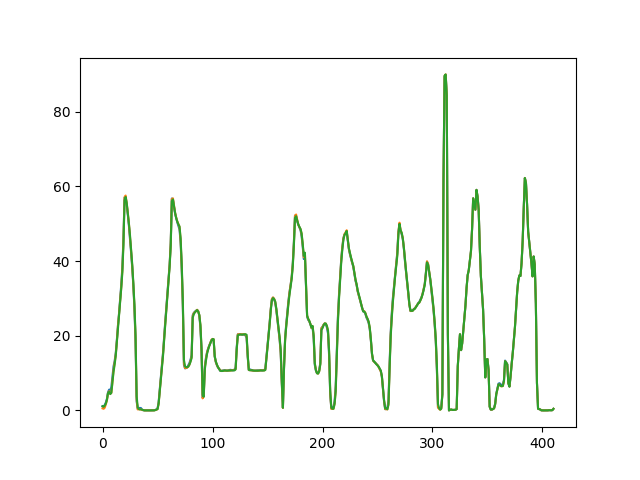

In [24]:
plt.close()
plt.plot(s[0])
plt.show()

In [28]:
pelak = pelak_img.copy()
xi = 0
flag1 = False
flag2 = False
xi1 = 0
xi2 = 0
img_array = []
result = []

for i in s[0]:
    xi += 1

    if np.all(i > 9) and flag1 == True and flag2 == False:
        flag2 = True
    if np.all(i < 5): 
        pelak = cv2.line(pelak, (xi, 0), (xi, 90), (0, 0, 255), 1)

        if flag1 == False:
            xi1 = xi

        if flag2 == True:
            xi2 = xi
            flag2 = False
            croped = pelak_img[:,xi1 : xi2]


            x1 = np.empty((0 , 6400))
            test_resize = cv2.resize(croped , (40 , 160))
            test_2gray = cv2.cvtColor(test_resize , cv2.COLOR_BGR2GRAY)
            testim_flatten = test_2gray.flatten()
            x1 = np.append(x1 , [testim_flatten] , axis=0)
            custome_test = model.predict(x1)
            result.append(str(int(custome_test[0])))



            # cv2.imshow("photo", croped)
            # cv2.waitKey(0)
            # cv2.destroyAllWindows()

            xi1 = xi2




        flag1 = True
    

cv2.imshow("photo", pelak)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [29]:
ai_pelak = ''.join(result)


In [30]:
ai_pelak[:2] + "-" + ai_pelak[3:6] + "|" +ai_pelak[7:]

'12-365|11'